<center>
    <img src="https://internship.thesparksfoundation.info/assests/img/logo.png" width="300" alt="thesparksfoundation logo"  />
</center>

# GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

## Prediction using UnSupervised ML(clustering)

## Author : Ashwin Chaudhari

# Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# 1. Importing Relevant Libraries

In [1]:
# warnings 
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
sns.set()

# 2. Loading Dataset

In [2]:
data = pd.read_csv(r"C:\Users\smart\Downloads\Iris (1).csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 3. Data Preprocessing
## Checking For Null Values, Missing Values, Shape and Data-type 

In [3]:
data = data.drop('Id',axis=1)
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 4. Visualization of Dataset

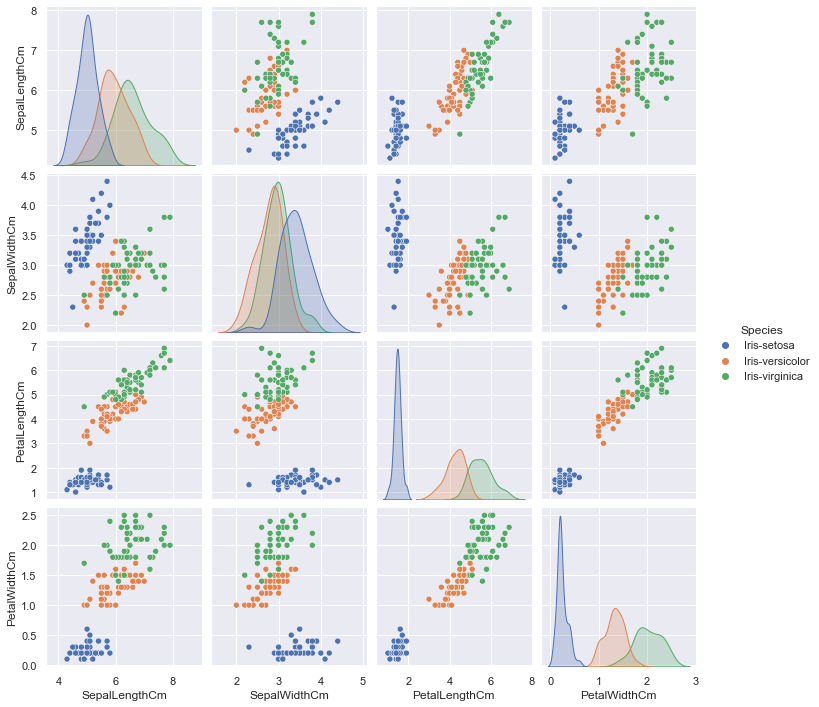

In [6]:
sns.pairplot(data,hue='Species')

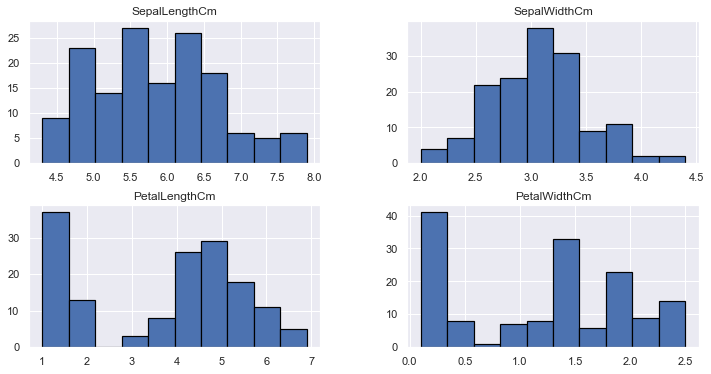

In [7]:
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

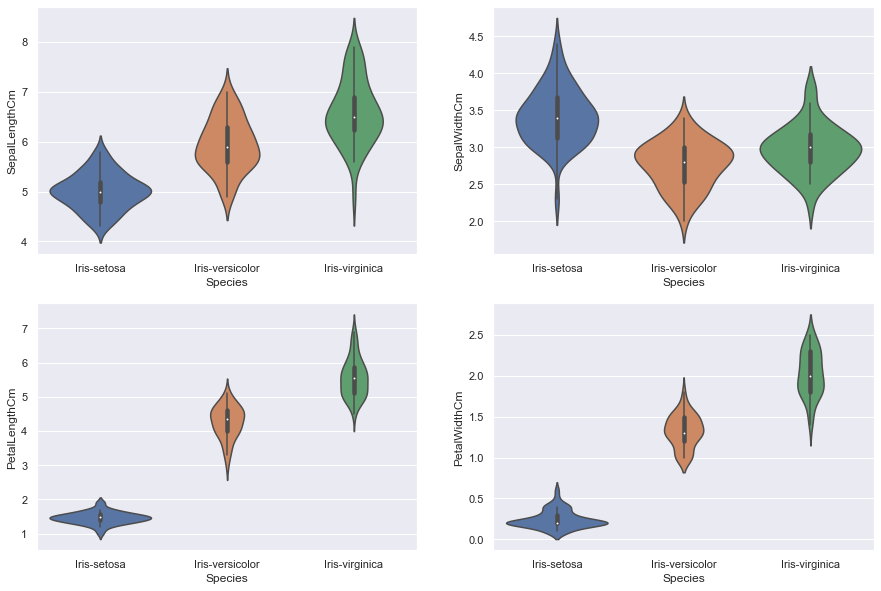

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=data)

# 5. SEPAL Clustering

In [9]:
x = data.iloc[:,0:2]
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


# 5.1 Target Cluster

In [10]:
target_cluster = data['Species'].map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2})
target_cluster

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# 5.2 Standardization of Dataset

In [11]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# 5.3 Elbow-Method 
(TO FIND OPTIMAL NUMBER OF CLUSTERS)

In [12]:
wcss = []
for i in range (1,7):
    kmeans_sepal = KMeans(i)
    kmeans_sepal.fit(x_scaled)
    wcss_iter = kmeans_sepal.inertia_
    wcss.append(wcss_iter)
wcss    

[300.00000000000006,
 168.39262198361095,
 103.78982520596088,
 79.7676309366884,
 62.07205418976128,
 52.853988653225834]

Text(0, 0.5, 'WCSS')

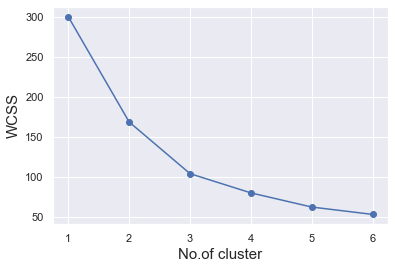

In [13]:
plt.plot(range(1,7),wcss,marker="o")
plt.xlabel('No.of cluster',size=15)
plt.ylabel('WCSS',size=15)

AS WE CAN SEE THAT AFTER 3rd CLUSTER THERE IS NO IMPROVEMENT. SO,OPTIMAL NUMBER OF CLUSTERS ARE 3. 

# 5.4 K-Means Clustering (SEPAL)

In [14]:
kmeans_sepal = KMeans(3)
kmeans_sepal.fit(x_scaled)

KMeans(n_clusters=3)

In [15]:
data_with_cluster = x.copy()
data_with_cluster['clusters'] = kmeans_sepal.fit_predict(x_scaled)
data_with_cluster['actual_species'] = target_cluster
data_with_cluster

,SepalLengthCm,SepalWidthCm,clusters,actual_species
0,5.1,3.5,1,1
1,4.9,3.0,1,1
2,4.7,3.2,1,1
3,4.6,3.1,1,1
4,5.0,3.6,1,1
...,...,...,...,...
145,6.7,3.0,0,2
146,6.3,2.5,2,2
147,6.5,3.0,0,2
148,6.2,3.4,0,2


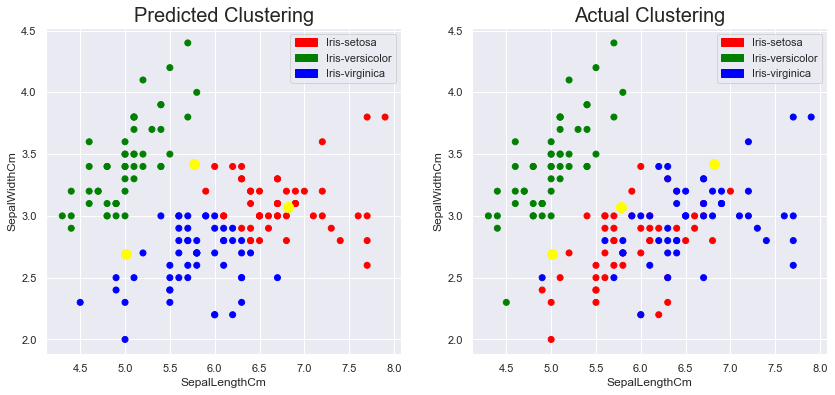

In [16]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')
plt.subplot(1,2,1)
plt.scatter(data_with_cluster['SepalLengthCm'],data_with_cluster['SepalWidthCm'],c=colors[data_with_cluster['clusters']])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Predicted Clustering',size=20)
plt.scatter(kmeans_sepal.fit(x).cluster_centers_[:, 0], kmeans_sepal.fit(x).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.subplot(1,2,2)
plt.scatter(data_with_cluster['SepalLengthCm'],data_with_cluster['SepalWidthCm'],c=colors[data_with_cluster['actual_species']])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Actual Clustering',size=20)
plt.scatter(kmeans_sepal.fit(x).cluster_centers_[:, 0], kmeans_sepal.fit(x).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# 5.5 . Accuracy of the Model (Sepal)

In [17]:
sm.confusion_matrix(data_with_cluster['clusters'], data_with_cluster['actual_species'])

array([[15,  0, 34],
       [ 0, 49,  0],
       [35,  1, 16]], dtype=int64)

In [18]:
sm.accuracy_score(data_with_cluster['clusters'], data_with_cluster['actual_species'])

0.5333333333333333

# 6. Petal Clustering

In [19]:
y = data.iloc[:,2:4]
y

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


# 6.1 Standardization of Dataset

In [20]:
from sklearn import preprocessing
y_scaled = preprocessing.scale(y)
y_scaled

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

# 6.2 Elbow-Method
TO FIND THE OPTIMAL NUMBER OF CLUSTERS

In [21]:
wcss = []
for i in range (1,7):
    kmeans_petal = KMeans(i)
    kmeans_petal.fit(y_scaled)
    wcss_iter = kmeans_petal.inertia_
    wcss.append(wcss_iter)
wcss

[300.0000000000001,
 54.14584701344988,
 18.046983891906265,
 12.307440251261838,
 9.17423384464461,
 7.2103108053491525]

Text(0, 0.5, 'WCSS')

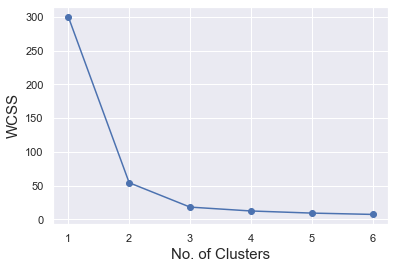

In [22]:
plt.plot(range(1,7),wcss,marker="o")
plt.xlabel('No. of Clusters',size=15)
plt.ylabel('WCSS',size=15)

AS WE CAN SEE THAT AFTER 3rd CLUSTER THERE IS NO IMPROVEMENT. SO,OPTIMAL NUMBER OF CLUSTERS ARE 3. 

# 6.3 K-Means Clusering (PETAL)

In [23]:
kmeans_petal = KMeans(3)
kmeans_petal.fit(y_scaled)

KMeans(n_clusters=3)

In [24]:
data_with_cluster2 = y.copy()
data_with_cluster2['clusters'] = kmeans_petal.fit_predict(y_scaled)
data_with_cluster2['actual_species'] = target_cluster
data_with_cluster2

,PetalLengthCm,PetalWidthCm,clusters,actual_species
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,1,2
146,5.0,1.9,1,2
147,5.2,2.0,1,2
148,5.4,2.3,1,2


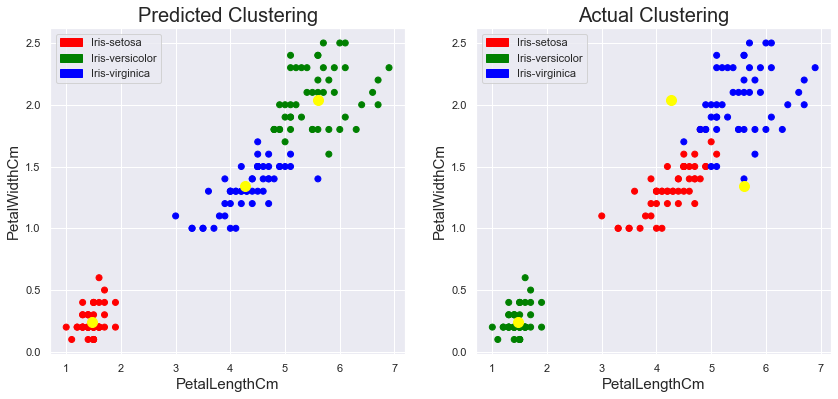

In [25]:
plt.figure(figsize=(14,6))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Iris-setosa','Iris-versicolor','Iris-virginica'])
red_patch = mpatches.Patch(color='red', label='Iris-setosa')
green_patch = mpatches.Patch(color='green', label='Iris-versicolor')
blue_patch = mpatches.Patch(color='blue', label='Iris-virginica')
plt.subplot(1,2,1)
plt.scatter(data_with_cluster2['PetalLengthCm'],data_with_cluster2['PetalWidthCm'],c=colors[data_with_cluster2['clusters']])
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Predicted Clustering',size=20)
plt.scatter(kmeans_petal.fit(y).cluster_centers_[:, 0], kmeans_petal.fit(y).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.subplot(1,2,2)
plt.scatter(data_with_cluster2['PetalLengthCm'],data_with_cluster2['PetalWidthCm'],c=colors[data_with_cluster2['actual_species']])
plt.xlabel('PetalLengthCm',size=15)
plt.ylabel('PetalWidthCm',size=15)
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.title('Actual Clustering',size=20)
plt.scatter(kmeans_petal.fit(y).cluster_centers_[:, 0], kmeans_petal.fit(y).cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

# 6.4 Accuracy of the model (Petal)

In [26]:
sm.confusion_matrix(data_with_cluster2['clusters'], data_with_cluster2['actual_species'])

array([[ 0, 50,  0],
       [ 2,  0, 46],
       [48,  0,  4]], dtype=int64)

In [27]:
sm.accuracy_score(data_with_cluster2['clusters'], data_with_cluster2['actual_species'])

0.02666666666666667